In [1]:
import pickle as pk
import numpy as np
from glob import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
stack='MD589'
cell_dir = os.environ['ROOT_DIR']+'CSHL_cells_dm/'+stack+'/'

In [3]:
structures = [dir for dir in glob(cell_dir+'/*')]
print(structures)

['/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/3N', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/4N', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/5N', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/6N', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/7N', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/7n', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/Amb', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/LC', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/Pn', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/RMC', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/SNC', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/SNR', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/Sp5I', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/VLL', '/data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/Sp5C', '/data/BstemAtlasDataBackup/uc

0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/3N/MD589_3N_positive.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/3N/MD589_3N_negative.pkl
15 (14299, 200) (52483, 200)
51 (56143, 200) (295691, 200)
201 (8375, 40) (37381, 40)
0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/4N/MD589_4N_positive.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/4N/MD589_4N_negative.pkl
15 (285, 200) (12814, 200)
51 (1387, 200) (66667, 200)
201 (161, 40) (6807, 40)
0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/5N/MD589_5N_negative_part.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/5N/MD589_5N_positive.pkl
15 (16668, 200) (88834, 200)
51 (74402, 200) (263547, 200)
201 (8952, 40) (35191, 40)
0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/6N/MD589_6N_positive.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/6N/MD589_6N_negative.pkl
15 (428, 200) (6589, 200)
51 (1913, 200) (33832, 200)


/data/venv/shapeology_venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/data/venv/shapeology_venv/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


201 (180, 40) (2519, 40)
0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/7n/MD589_7n_negative_part.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/7n/MD589_7n_positive.pkl
15 (14413, 200) (17113, 200)
51 (80126, 200) (93788, 200)
201 (5464, 40) (6241, 40)
0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/Amb/MD589_Amb_positive.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/Amb/MD589_Amb_negative.pkl
Amb cannot load file

0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/RMC/MD589_RMC_negative_part.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/RMC/MD589_RMC_positive.pkl
15 (15220, 200) (35487, 200)
51 (76223, 200) (169700, 200)
201 (8579, 40) (22484, 40)
0 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/10N/MD589_10N_positive.pkl
1 /data/BstemAtlasDataBackup/ucsd_brain/CSHL_cells_dm/MD589/10N/MD589_10N_negative_part.pkl
15 (4667, 200) (14320, 200)
51 (22053, 200) (74913, 200)
201 (5490, 40) (107

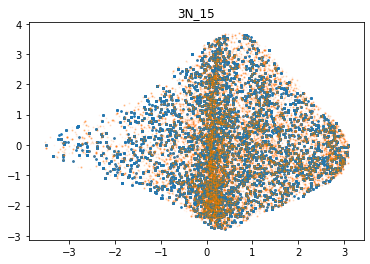

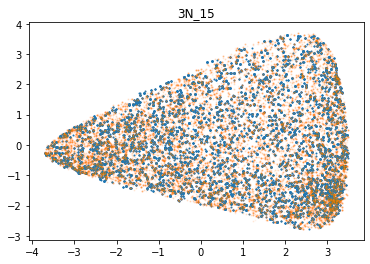

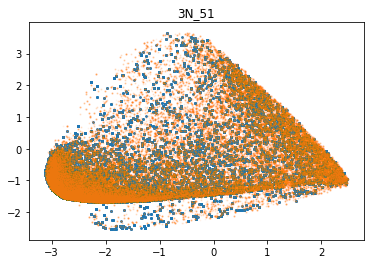

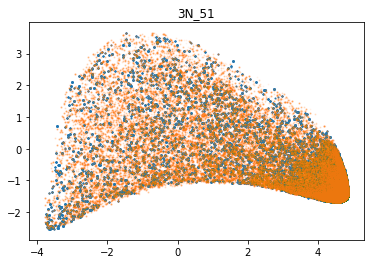

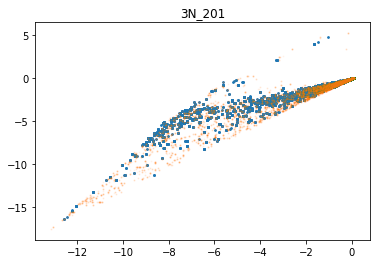

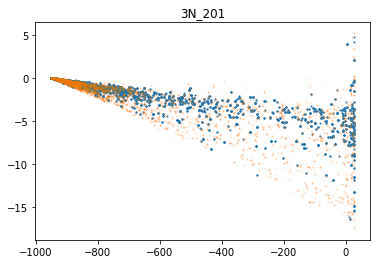

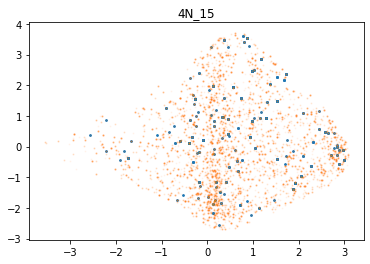

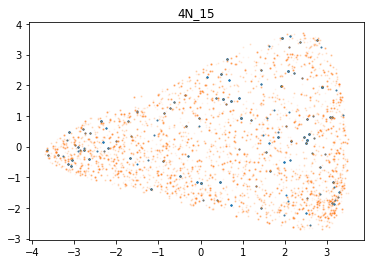

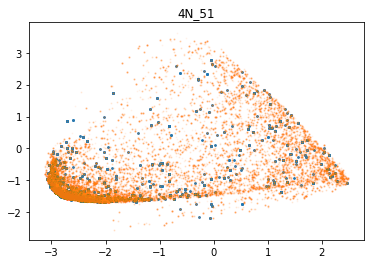

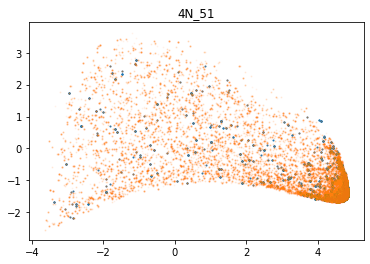

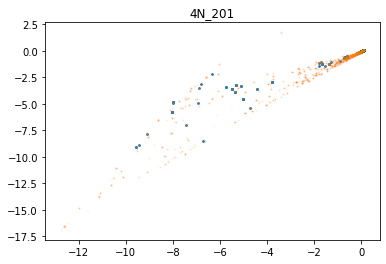

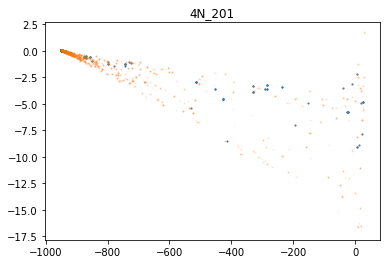

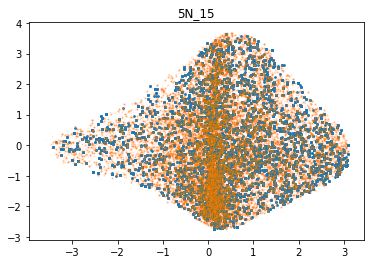

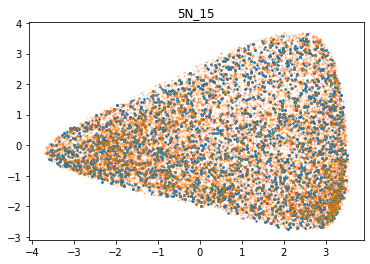

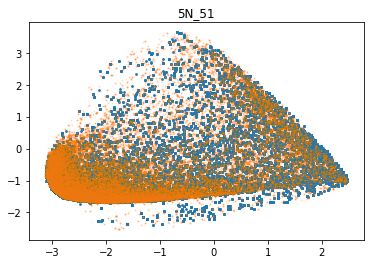

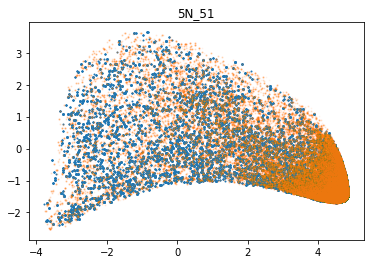

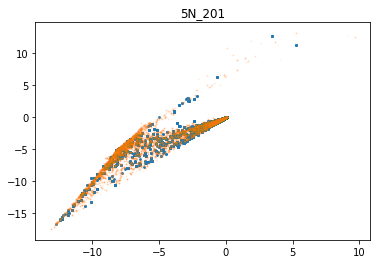

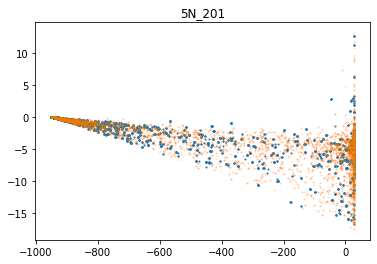

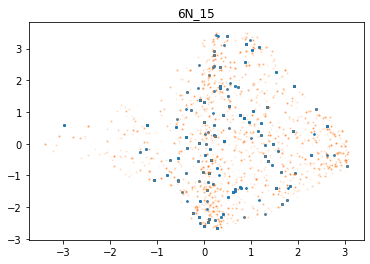

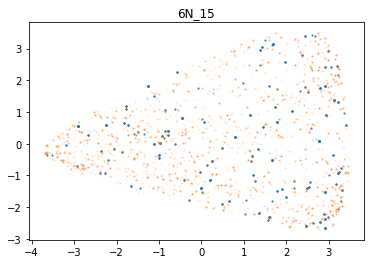

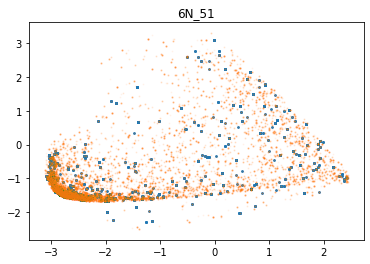

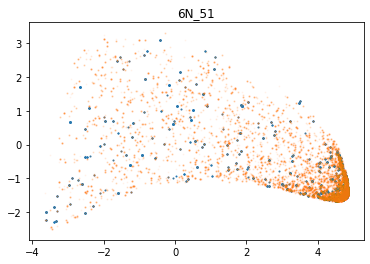

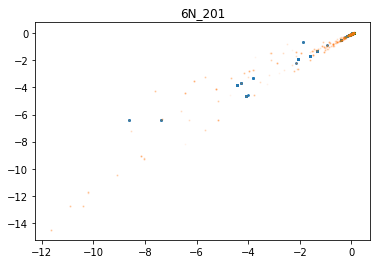

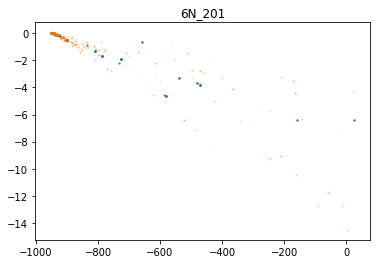

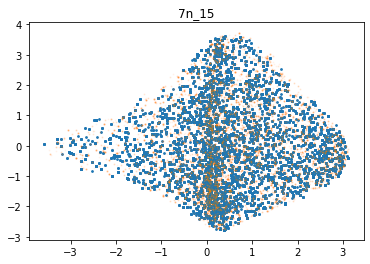

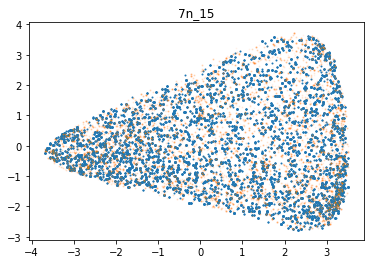

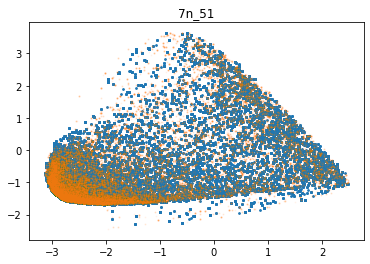

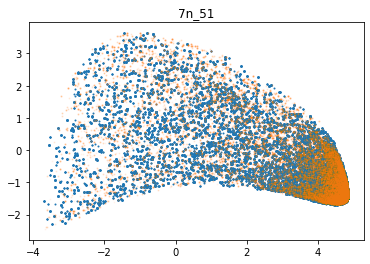

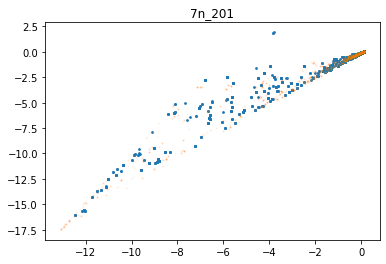

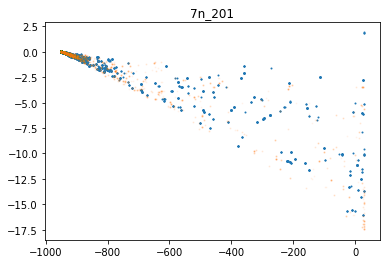

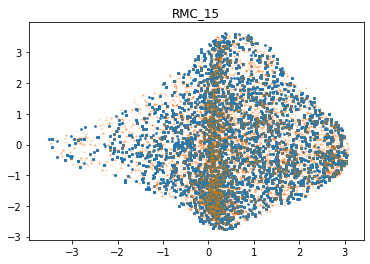

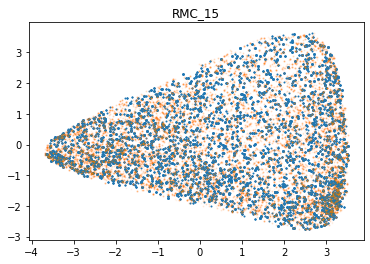

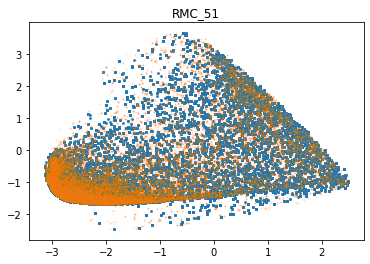

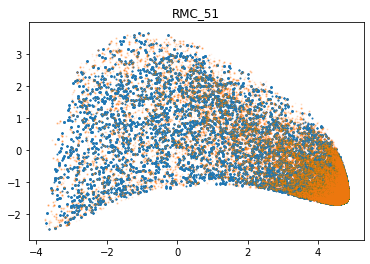

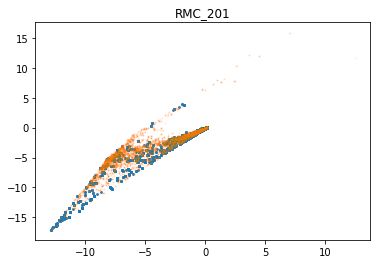

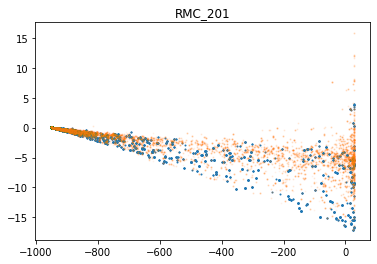

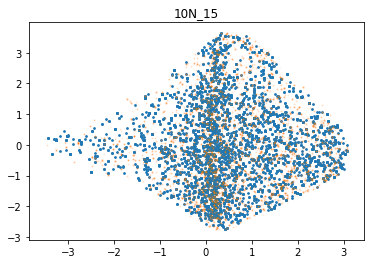

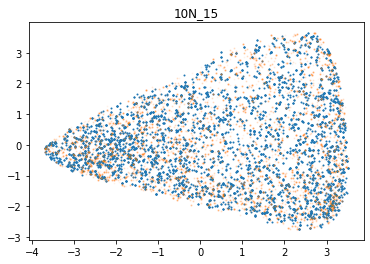

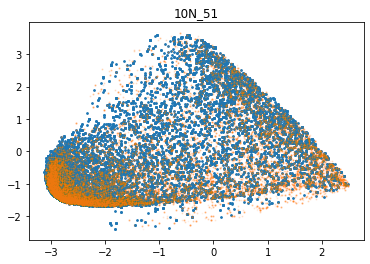

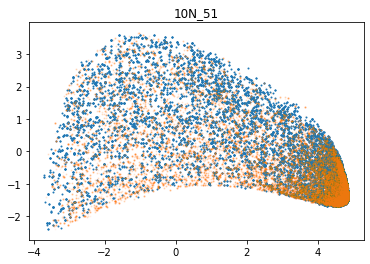

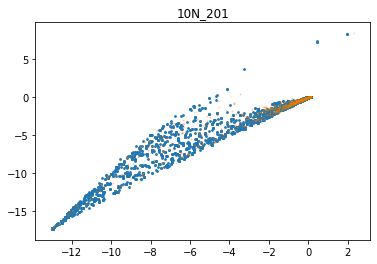

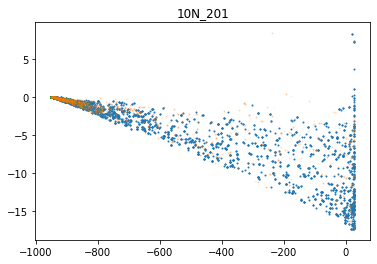

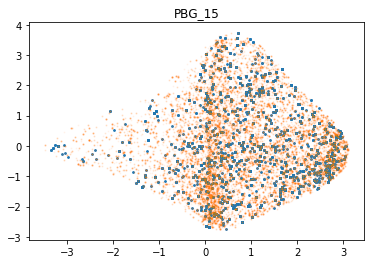

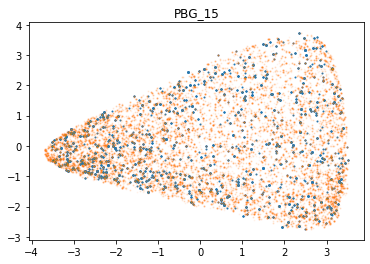

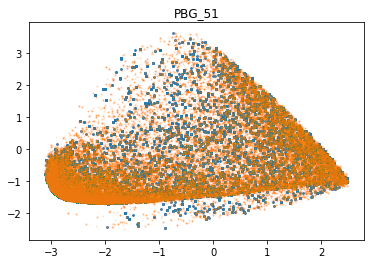

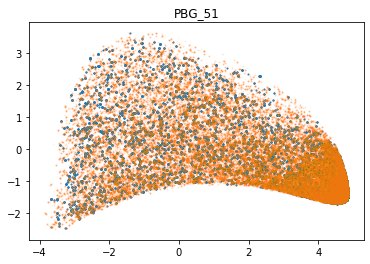

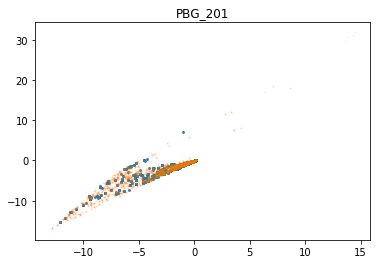

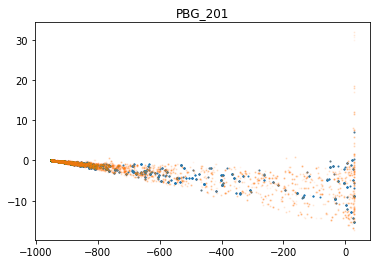

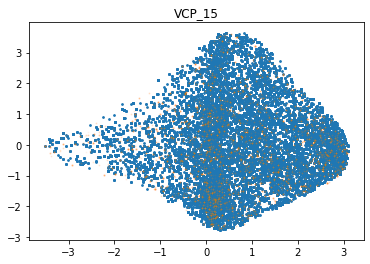

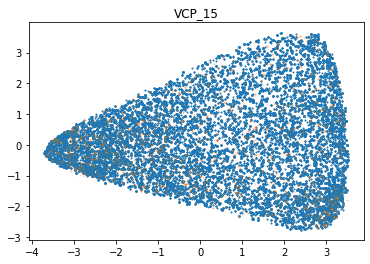

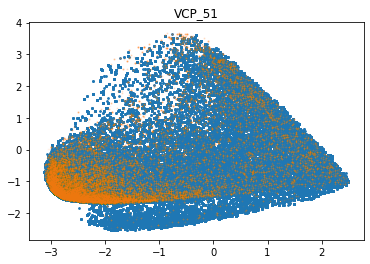

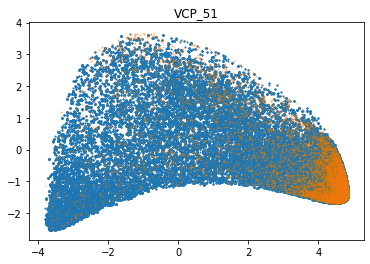

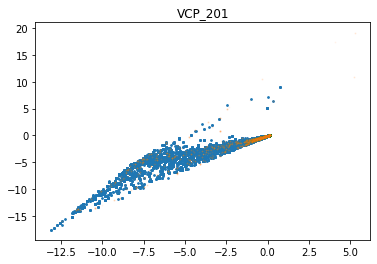

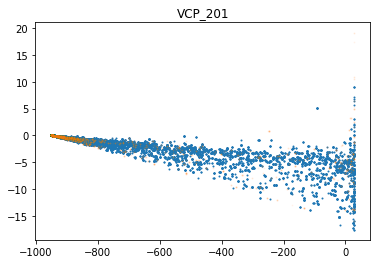

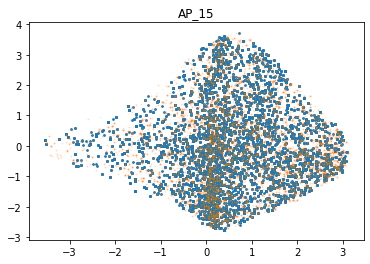

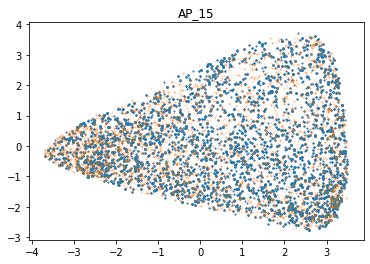

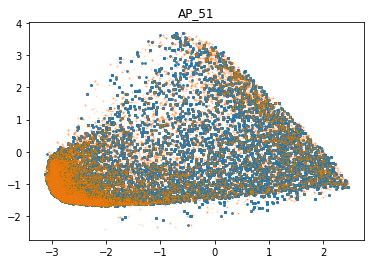

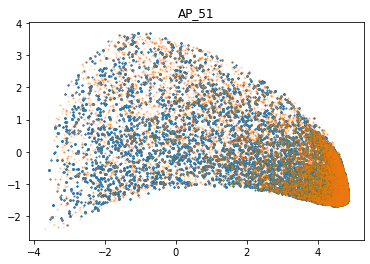

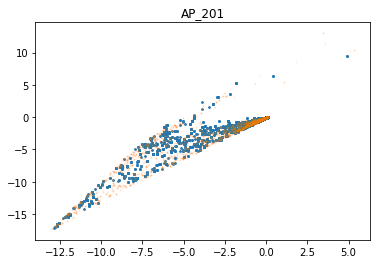

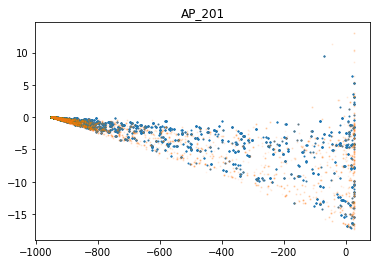

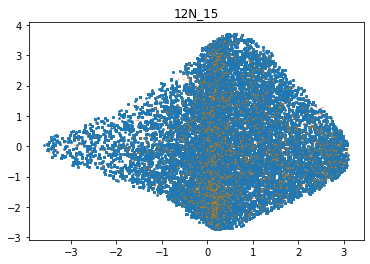

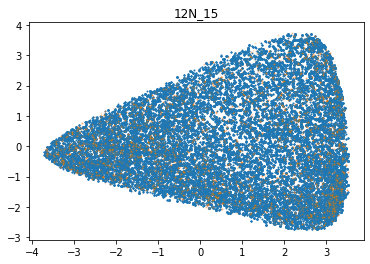

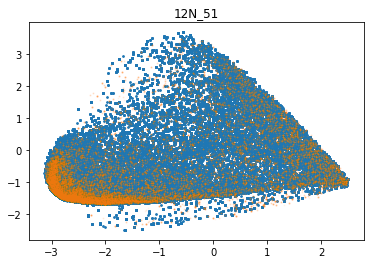

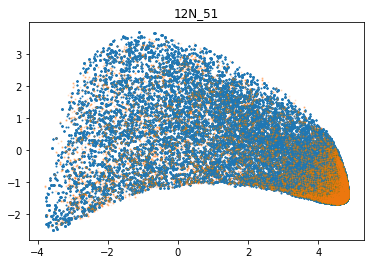

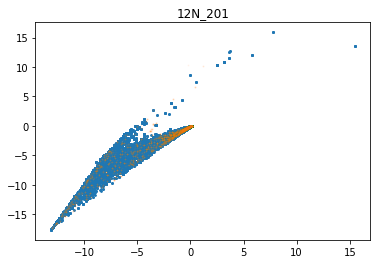

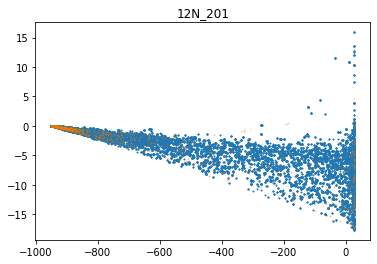

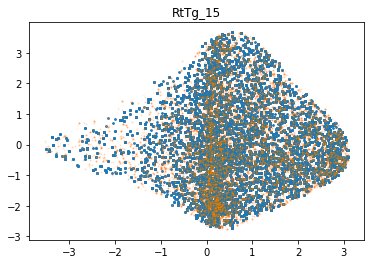

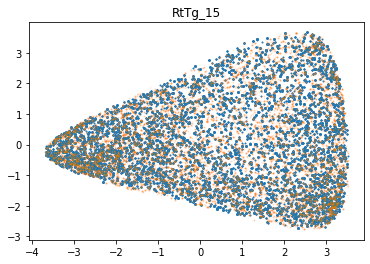

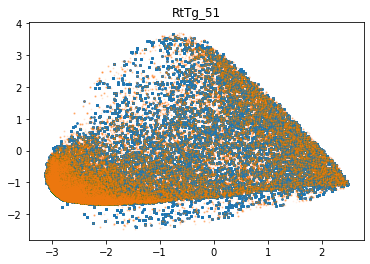

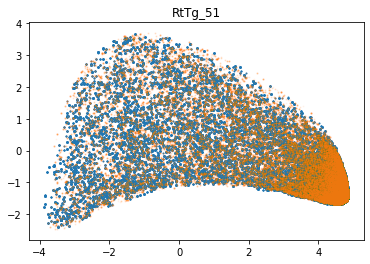

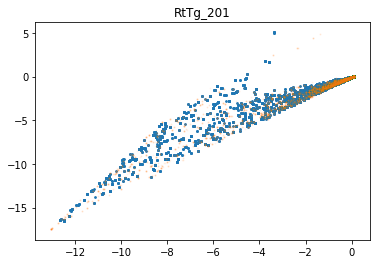

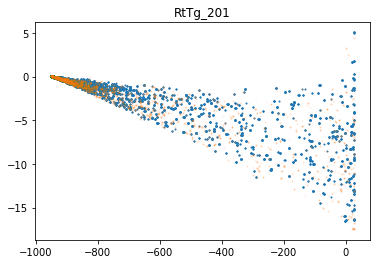

In [5]:
for i in structures:
#i = structures[0]
    slash = i.rfind('/')
    struc = i[slash+1:]
    samples = [dir for dir in glob(i+'/*')]
    if len(samples)==2:
        try:
            sets=[[],[]]
            print(0,samples[0])
            sets[0]=pk.load(open(samples[0],'rb'))
            print(1,samples[1])
            sets[1]=pk.load(open(samples[1],'rb'))
            for size in [15,51,201]:
                dm=[[],[]]
                for j in range(len(samples)):
                    sample = sets[j]
                    for k in range(len(sample)):
                        if sample[k]['padded_size']==size:
                            try:
                                dm[j].append(sample[k]['DMVec'])
                            except:
                                continue
                if len(dm):
                    dm1=np.array(dm[0])
                    dm2=np.array(dm[1])
                    print(size, dm1.shape,dm2.shape)
                    fig_name = struc+'_'+str(size)
                    figure() #figsize=[12,10]
                    pylab.title(fig_name)
                    pylab.scatter(dm1[:,1],dm1[:,2],s=3)
                    pylab.scatter(dm2[:,1],dm2[:,2],s=1,alpha=0.05)
                    figure()
                    pylab.title(fig_name)
                    pylab.scatter(dm1[:,0],dm1[:,2],s=1)
                    pylab.scatter(dm2[:,0],dm2[:,2],s=1,alpha=0.05)
        except:
            print(struc+' cannot load file\n')
            pass

    

# xlim([-4,-2])
# ylim([-2,0])